In [6]:
import numpy as np
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from matplotlib.collections import LineCollection
import corner
import matplotlib.lines as mlines
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import glob

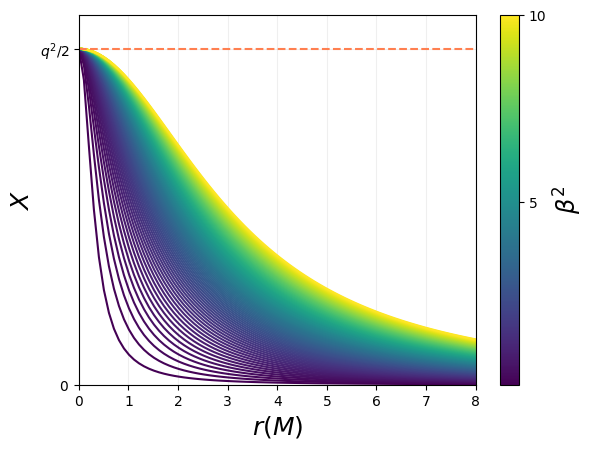

In [7]:
x = np.linspace(0, 10, 100)
rates = np.arange(0.1,10.1,0.1)

lines = [np.column_stack([x, (1/2)*((b)/(b+(x)**2))]) for b in rates]

fig, ax = plt.subplots()

lc = LineCollection(lines, cmap='viridis',array=rates)
line = ax.add_collection(lc)

ticks=['$-q^2$','$-q^2/2$','$0$','$q^2/2$','$q^2$']
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_yticklabels(ticks)

def x_function(b,e,x):
    return (1/2)*((b)/(b+e*(x)**2))
a4 = x_function(1,0,x)
ax.plot(x,a4, color='Coral', linestyle='--')

plt.xlim(0, 8)
plt.xlabel(r"$r(M)$", size = 18)
plt.ylabel(r"$X$", size = 18)
plt.grid(alpha=0.2)
plt.margins(x=0)
plt.ylim(0, 0.55)
cb = fig.colorbar(line, ticks=[-10,-5,0,5,10])
cb.set_label(label='$\\beta^2$', size='xx-large')
plt.savefig('X-plot.pdf', bbox_inches='tight',transparent=True)

C:\Users\user\AppData\Local\Temp\ipykernel_28004\431989708.py:20: RuntimeWarning: invalid value encountered in scalar power
  if z_**2 + (x_/y_)*((1-y_**2)/(1-x_**2))**(1/2)<0:


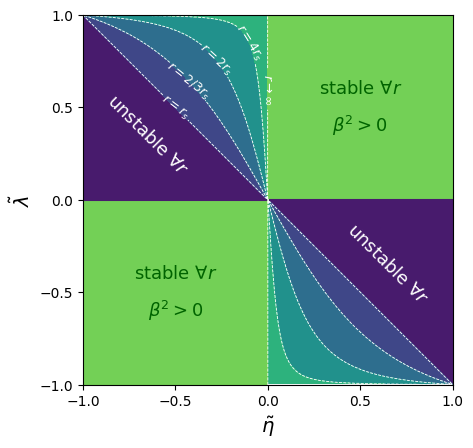

In [12]:
y = np.arange(-1,1.000001,.001)
x = np.arange(-0.999999999999,1.0000000001,.001)
z = np.linspace(0, 1, 5)

Y,X = np.meshgrid(y,x)

fig = plt.figure()
ax = fig.add_subplot()

maxf = np.zeros(shape = Y.shape)

for i,x_ in enumerate(x):
    for j, y_ in enumerate(y):
        if  x_*y_>0:
            maxf[i,j] =6
        elif x_*y_+y_**2<0:
            maxf[i,j] =1
        elif True:
            for k,z_ in enumerate(z):
                if z_**2 + (x_/y_)*((1-y_**2)/(1-x_**2))**(1/2)<0:
                    maxf[i,j] =5-k
                
matplotlib.rcParams['font.family'] = ['sans']
cp2=plt.contourf(X,Y,maxf,[0,1,2,3,4,5,6,7],cmap="viridis")
fmt = {}
strs = [r'$r=r_s$',r'$r=r_s$', r'$r=2/3r_s$', r'$r=2r_s$', r'$r=4r_s$', r'$r\rightarrow\infty$', r'$r\rightarrow\infty$']
for l, s in zip(cp2.levels, strs):
    fmt[l] = s
contours = plt.contour(X, Y, maxf, [1,2,3,4,5], linestyles='dashed', linewidths=0.6, colors='w')
plt.clabel(contours, inline=True, fontsize=9, fmt=fmt, manual=((-0.5, 0.5), (-0.4, 0.7), (-0.25, 0.8), (-0.1,0.85), (0,0.6)))

plt.xticks(np.arange(-1, 1.1, step=0.5),fontsize=10)
plt.yticks(np.arange(-1, 1.1, step=0.5),fontsize=10)
plt.xlabel(r'$\tilde{\eta}$')
plt.ylabel(r'$\tilde{\lambda}$')
plt.plot([-1, -0.01], [0, 0], linewidth=1.5, color='#481b6d')
plt.plot([0.01, 1], [0, 0], linewidth=1.5, color='#481b6d')
#plt.colorbar(label="str")
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

ax.text(
    0.5, 0.6, "stable " r'$\forall r$', ha="center", va="center",color='darkgreen', size=13,alpha=1)
ax.text(
    0.5, 0.4, r'$\beta^2>0$', ha="center", va="center",color='darkgreen', size=13,alpha=1)
ax.text(
    -0.5, -0.4, "stable " r'$\forall r$', ha="center", va="center",color='darkgreen', size=13,alpha=1)
ax.text(
    -0.5, -0.6, r'$\beta^2>0$', ha="center", va="center",color='darkgreen', size=13,alpha=1)
ax.text(
    0.65, -0.35, "unstable " r'$\forall r$', ha="center", va="center",color='w',rotation=-45, size=13,alpha=1)
ax.text(
    -0.65, 0.35, "unstable " r'$\forall r$', ha="center", va="center",color='w',rotation=-45, size=13,alpha=1)
plt.savefig("stability.pdf",transparent=True)
plt.show()

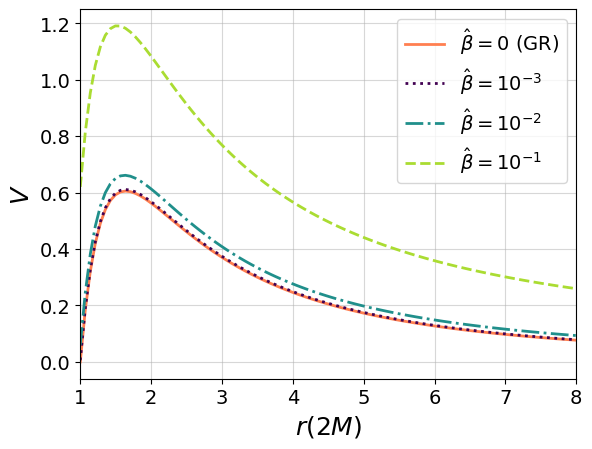

In [8]:
def potential(x,M,l,q,b):
    return (((2*M)**2)) * ( (1-(2*M)/(x*2*M))*((l*(l+1))/((x*2*M)**2)-(6*M)/((x*2*M)**3))+((q*b)/(x*2*M))*(l*(l+1)+1-(8*M)/(x*2*M))+(q**2)*(b**2) )

def potential2(x,M,l,b):
    return (b**2)/M + ((x-2*M)*((l**2)*x+l*x-6*M))/(x**4) + b*(((l**2)*x+l*x+x-8*M)/(M*x**2))

plt.rcParams.update({'font.size': 14})
x = np.linspace(1, 8, 100)

plt.plot(x,potential2(x,1/2,2,0), color='Coral', linewidth='2', label=r'$\hat\beta=0$ (GR)')
plt.plot(x,potential2(x,1/2,2,0.001), color='#420152', linestyle=':', linewidth='2', label=r'$\hat\beta=10^{-3}$')
plt.plot(x,potential2(x,1/2,2,0.01), color='#208f8b', linestyle='-.', linewidth='2', label=r'$\hat\beta=10^{-2}$')
plt.plot(x,potential2(x,1/2,2,0.1), color='#aadc32', linestyle='--', linewidth='2', label=r'$\hat\beta=10^{-1}$')
plt.legend()
plt.xlabel(r"$r(2M)$", size = 18)
plt.ylabel(r"$V$", size = 18)
plt.grid(alpha=0.5)
plt.margins(x=0)
plt.savefig('V-potential.pdf', bbox_inches='tight')

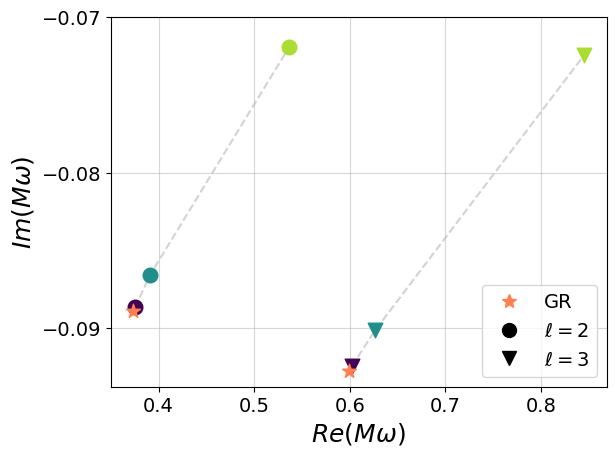

In [9]:
fig, ax = plt.subplots()

re = np.array([0.375415 ,0.391376,0.536371])
im = np.array([-0.0886448,-0.0865363,-0.0719439 ])
re3 = np.array([0.602188,0.626549,0.845145])
im3 = np.array([-0.0924333,-0.0901045,-0.0724319])
beta_values = np.array([-3,-2,-1])

# Plot the quasinormal modes
plt.scatter(0.373619,-0.088891, color='Coral', marker='*', zorder=3, s=110, label="GR")
plt.scatter(0.599443 ,-0.0927025, color='Coral', marker='*', zorder=3, s=110,)
plt.scatter(0.375415 ,-0.0886448, color='#420152', marker='o', zorder=2, s=110,)
plt.scatter(0.391376 ,-0.0865363, color='#208f8b', marker='o', zorder=2, s=110,)
plt.scatter(0.536371 ,-0.0719439, color='#aadc32', marker='o', zorder=2, s=110,)
plt.scatter(0.602188 ,-0.0924333, color='#420152', marker='v', zorder=2, s=110,)
plt.scatter(0.626549 ,-0.0901045, color='#208f8b', marker='v', zorder=2, s=110,)
plt.scatter(0.845145 ,-0.0724319, color='#aadc32', marker='v', zorder=2, s=110,)

x_2 = np.sort(re)
y_2 = im[np.argsort(re)]
plt.plot(x_2, y_2, color='lightgrey',linestyle='--', zorder=1)

x_3 = np.sort(re3)
y_3 = im3[np.argsort(re3)]
plt.plot(x_3, y_3, color='lightgrey',linestyle='--', zorder=1)

plt.xlabel('$Re(M\omega)$', size = 18)
plt.ylabel('$Im(M\omega)$', size = 18)
plt.grid(alpha=0.5)

ax.set_yticks([-0.09,-0.08,-0.07])
GR_star = mlines.Line2D([], [], color='Coral', marker='*', linestyle='None',
                          markersize=10, label='GR')
l_2 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=10, label="$\ell=2$")
l_3 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                          markersize=10, label="$\ell=3$")

plt.legend(handles=[GR_star,l_2,l_3],loc='lower right')
plt.savefig('QNM-plot.pdf', bbox_inches='tight')
plt.show()

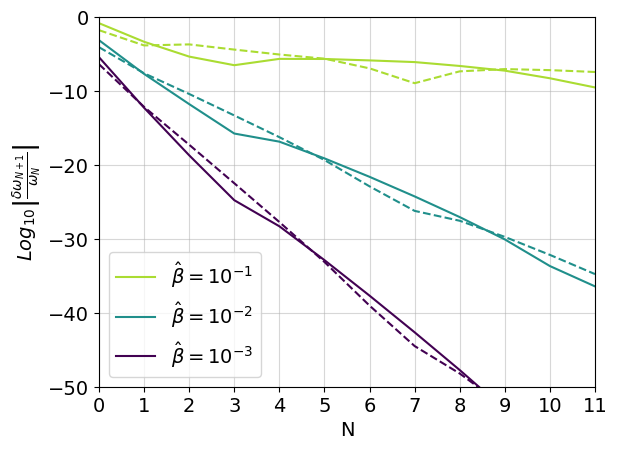

In [10]:
power_exp = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
re_beta_one = np.array([-0.819695, -3.33474, -5.33966, -6.50478, -5.64767, -5.66348, -5.85499, -6.08202, -6.60656, -7.24201, -8.27221, -9.51285])
re_beta_two = np.array([-3.12228, -7.67989, -11.7677, -15.748, -16.8467, -19.1082, -21.6041, -24.255, -27.0514, -30.0713, -33.6756, -36.4251])
re_beta_three = np.array([-5.42487, -12.2624, -18.6941, -24.7677, -28.2955, -32.8741, -37.68, -42.6394, -47.745, -53.079, -59.0323, -63.9456])
im_beta_one = np.array([-1.76588, -3.82937, -3.68994, -4.39089, -5.05707, -5.62058, -6.9322, -8.9379, -7.33607, -7.03119, -7.17116, -7.42117])
im_beta_two = np.array([-4.06846, -7.59778, -10.3951, -13.2997, -16.239, -19.3312, -22.8933, -26.2131, -27.5495, -29.7297, -32.1647, -34.7628])
im_beta_three = np.array([-6.37105, -12.1478, -17.2611, -22.473, -27.7214, -33.1263, -39.0261, -44.4996, -48.2114, -52.7072, -57.4517, -62.3582])
beta_values = np.array([-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1])

fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
plt.plot(power_exp, re_beta_one, color='#aadc32', label="$\hat\\beta=10^{-1}$")
plt.plot(power_exp, re_beta_two, color='#208f8b', label="$\hat\\beta=10^{-2}$")
plt.plot(power_exp, re_beta_three, color='#420152', label="$\hat\\beta=10^{-3}$")
plt.plot(power_exp, im_beta_one, color='#aadc32', linestyle='--')
plt.plot(power_exp, im_beta_two, color='#208f8b', linestyle='--')
plt.plot(power_exp, im_beta_three, color='#420152', linestyle='--')

plt.grid(alpha=0.5)

plt.ylabel("$Log_{10}\left|\\frac{\delta\omega_{N+1}}{\omega_{N}}\\right|$")
plt.xlabel("N")

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11])
plt.yticks([0,-10,-20,-30,-40,-50])

plt.legend(loc='lower left')

plt.xlim(0, 11)
plt.ylim(-50, 0)

plt.savefig('QNM-error-plot.pdf', bbox_inches='tight')

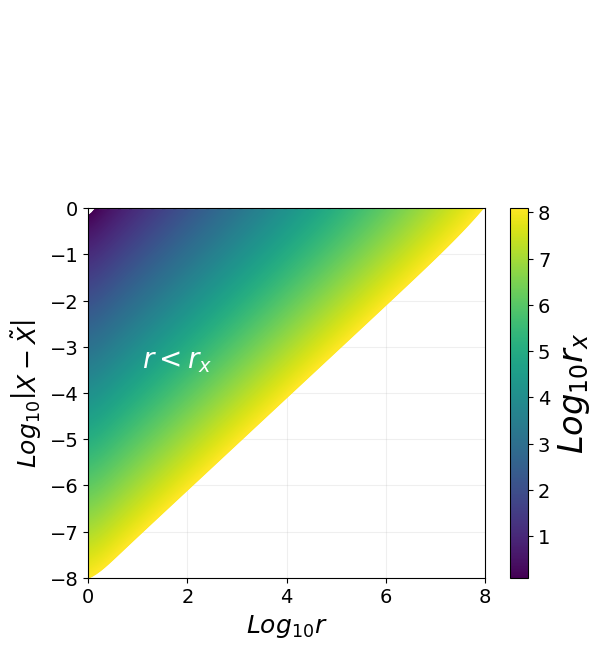

In [11]:
def X_large_r_diff(a,b):
    return (1) / (2+2*(10)**(2*a)) - (10**(2*b)-2*10**b*10**a*(1+10**(2*a))*((2+10**(3*a))/(10**a+10**(3*a)))**(1/2)-(10**a)*(-2+10**a-2*10**(2*a)+10**(3*a))) / (2*10**(2*b)*(1+10**(2*a)))

a = np.linspace(0, 8, 100)
rates = np.arange(0.1,8.1,0.01)

lines = [np.column_stack([a, np.log10(np.absolute(X_large_r_diff(a,b)))]) for b in rates]

fig, ax = plt.subplots()

lc = LineCollection(lines, cmap='viridis',array=rates)
line = ax.add_collection(lc)


plt.axhline(y = 0, color = 'white', linestyle = '--')

ax.text(
    1.8, -3.3, r'$r<r_x$', ha="center", va="center",color='w', size=20,alpha=1)

ax.text(
    5.5, 4, r'$r>r_x$', ha="center", va="center",color='w', size=20,alpha=1)

plt.xlim(0, 8)
plt.xlabel(r"$Log_{10}r$", size = 18)
plt.ylabel(r"$Log_{10}\left|X-\tilde{X}\right|$", size = 18)
plt.grid(alpha=0.2)
plt.margins(x=0)
plt.ylim(-8, 0)
cb = fig.colorbar(line)
cb.set_label(label='$Log_{10}r_x$', size='xx-large')
plt.savefig('X-plot-large-r.pdf', bbox_inches='tight',transparent=True)